In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# To plot pretty figures
import matplotlib as mpl

# Common imports
import numpy as np

from sklearn.datasets import fetch_mldata
from sklearn.linear_model import SGDClassifier
from IPython.core.interactiveshell import InteractiveShell
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline
import matplotlib.pyplot as plt
InteractiveShell.ast_node_interactivity = "all"
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = ".."
CHAPTER_ID = "classification"

/Users/shiweili/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  from collections import Mapping, defaultdict
/Users/shiweili/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# 加载 MNIST 数据

In [2]:
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
except ImportError:
    mnist = fetch_mldata('MNIST original')
mnist["data"], mnist["target"]

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([0., 0., 0., ..., 9., 9., 9.]))

In [3]:
X, y = mnist["data"], mnist["target"]
shuffle_index = np.random.permutation(60000)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

# 模型训练

In [9]:
sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train, y_train_5)
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
y_scores_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")
y_scores_forest = y_scores_forest[:, 1] 

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=-inf, verbose=0, warm_start=False)

In [10]:
y_train_pred = cross_val_predict(sgd_clf,  X_train, y_train_5, cv=3)
y_train_pred_for = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

In [11]:
# 行表示实际类别 列表示预测类别
# 精度 = TP /(TP + FP)
# 召回 = TP /(TP + FN)
print('SGD')
print(confusion_matrix(y_train_5, y_train_pred))
precision_score(y_train_5, y_train_pred)
recall_score(y_train_5, y_train_pred)
f1_score(y_train_5, y_train_pred)

print('fr')
confusion_matrix(y_train_5, y_train_pred_for)
precision_score(y_train_5, y_train_pred_for)
recall_score(y_train_5, y_train_pred_for)
f1_score(y_train_5, y_train_pred_for)

SGD
[[47700  6879]
 [  889  4532]]


0.3971606344755061

0.8360081165836561

0.5384980988593155

fr


array([[52943,  1636],
       [  851,  4570]])

0.73638414437641

0.8430178933776056

0.7861013159026404

<Figure size 576x288 with 0 Axes>

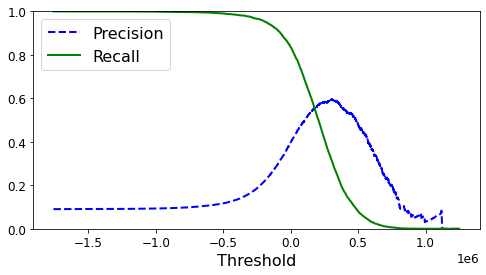

<Figure size 576x288 with 0 Axes>

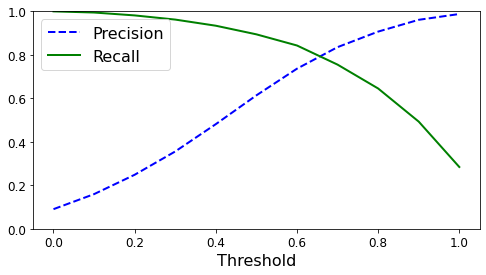

In [12]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
precisions_f, recalls_f, thresholds_f = precision_recall_curve(y_train_5, y_scores_forest)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions_f, recalls_f, thresholds_f)
plt.show()

<Figure size 576x432 with 0 Axes>

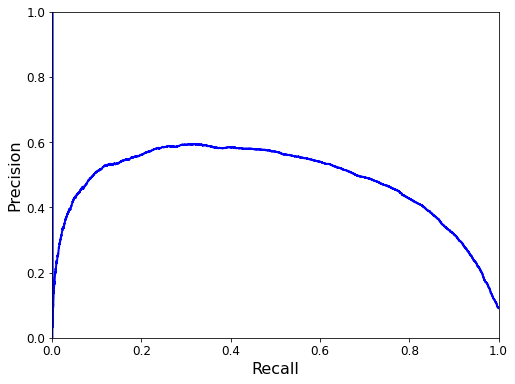

<Figure size 576x432 with 0 Axes>

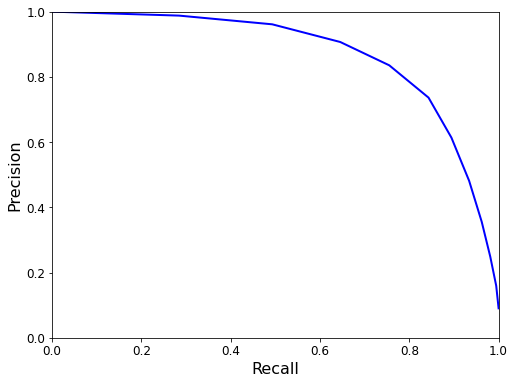

In [13]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()


plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions_f, recalls_f)
plt.show()

In [17]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
fpr_f, tpr_f, thresholds_f = roc_curve(y_train_5, y_scores_forest)


def plot_roc_curve(fpr, tpr, color, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label, color)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

    
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr, 'red')
plot_roc_curve(fpr_f, tpr_f, 'blue')
plt.show()

SyntaxError: positional argument follows keyword argument (<ipython-input-17-da696a939f39>, line 6)

In [32]:
roc_auc_score(y_train_5, y_scores)
roc_auc_score(y_train_5, y_scores_forest)

0.917402257366992

0.9065214973035081